In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
class perceptron:
    def __init__(self, input_dim, hidden_dim, output_dim, lr=0.01):
        self.w1 = np.random.normal(0.0, pow(hidden_dim, -0.5), (input_dim, hidden_dim))
        self.w2 = np.random.normal(0.0, pow(hidden_dim, -0.5), (hidden_dim, output_dim))
        self.h = np.zeros((1, hidden_dim))
        self.lr = lr
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        self.theta = 0

    def softmax(self, x):
        e_x = np.exp(x-np.max(x))
        return e_x / e_x.sum(axis=0)

    def sigmoid(self, x):
        return 1 / (1+np.exp(-x))

    def relu(self, x):
        return x * (x > 0)

    def relu_prime(self, x):
        return (x>0).astype(x.dtype)

    def tanh(self, x):
        return (np.exp(x)-np.exp(-x)) / (np.exp(x) + np.exp(-x))

    def feedforward(self, x):
        a = x.astype(float)
        b = self.w1.astype(float)
        self.h = self.relu(np.dot(a,b))
        return self.relu(np.dot(self.h, self.w2))


    def bprop_w2(self, g, y):
        q = (-2)*(g-y)*self.relu_prime(np.dot(self.h, self.w2))
        return np.dot(self.h.reshape(self.hidden_dim, 1), q.reshape(1, self.output_dim))

    def bprop_w1(self, g, y, x):
        q1 = (-2)*(g-y)*self.relu_prime(np.dot(self.h, self.w2))
        q2 = np.dot(self.w2, q1)
        q3 = q2*self.relu_prime(np.dot(x, self.w1))
        return np.dot(x.reshape(self.input_dim, 1), q3.reshape(1, self.hidden_dim))
    
    def training(self, input, target):
        x = np.array(input).T
        y = self.feedforward(x)
        g = np.array(target).T

        self.w1 = self.w1 - self.lr * self.bprop_w1(g, y, x)    #### w1 먼저 update 해주어야 함!!!
        self.w2 = self.w2 - self.lr * self.bprop_w2(g, y)

In [5]:
input_dim = 784
hidden_dim = 300
output_dim = 10
epoch = 20

pct = perceptron(input_dim, hidden_dim, output_dim, lr=0.01)

In [7]:
training_dataset_file = open("mnist_train.csv", 'r')

training_dataset_list = training_dataset_file.readlines()
training_dataset_list = training_dataset_list[1:]
training_dataset_file.close()
input_list = list()

for k in range(epoch):
    print("{0}% 진행중".format(k*100/epoch))
    pct.lr = pct.lr * 0.8    #### lr 안줄이면 최근에 배운것을 중요하게 생각해서 과거 배움을 지워버릴 수 있음
    for i in training_dataset_list:
        all_values = i.split(',')
        inputs = (np.asfarray(all_values[1:])/255.0*0.99) + 0.01    #### 흰색 부분이라고 해서 0을 줘버리면 x*w1*w2 하는데 영향력이 아예 0
                                                                    #### 최소 0.01, 최대 1로 해서 아무리 작은 부분이라도 영향은 주게끔
        input_list.append(inputs)

        targets = np.zeros(output_dim) + 0.01                       #### 역시 최솟값으로 0.01 사용
        targets[int(all_values[0])] = 0.99                          #### 실제 손글씨 label 값은 0.99 로 둔다. / one-hot encoding

        pct.training(inputs, targets)


0.0% 진행중
5.0% 진행중
10.0% 진행중
15.0% 진행중
20.0% 진행중
25.0% 진행중
30.0% 진행중
35.0% 진행중
40.0% 진행중
45.0% 진행중
50.0% 진행중
55.0% 진행중
60.0% 진행중
65.0% 진행중
70.0% 진행중
75.0% 진행중
80.0% 진행중
85.0% 진행중
90.0% 진행중
95.0% 진행중


In [8]:
test_dataset_file = open("mnist_test.csv", 'r')

test_dataset_list = test_dataset_file.readlines()
test_dataset_list = test_dataset_list[1:]
test_dataset_file.close()
output_list = list()

all_values = test_dataset_list[0].split(',')
print(all_values[0])
pct.feedforward(np.asfarray(all_values[1:]))

7


array([ -0.        ,  -0.        ,  -0.        ,  -0.        ,
        -0.        ,  -0.        ,  -0.        , 244.69090845,
        -0.        ,  -0.        ])

prediction fails, (target, prediction) =  2 4
Prediction =  [-0.         -0.          0.25485172 -0.          0.27195474 -0.
 -0.         -0.          0.02287498  0.21272141]
prediction fails, (target, prediction) =  4 2
Prediction =  [-0.         -0.          0.64042933 -0.         -0.         -0.
  0.39931317 -0.         -0.         -0.        ]
prediction fails, (target, prediction) =  6 0
Prediction =  [ 0.47015766 -0.         -0.         -0.         -0.         -0.
  0.17819434 -0.         -0.         -0.        ]
prediction fails, (target, prediction) =  2 7
Prediction =  [-0.         -0.          0.25399238 -0.         -0.         -0.
 -0.          0.47085451 -0.         -0.        ]
prediction fails, (target, prediction) =  5 3
Prediction =  [-0.          0.15802055 -0.          0.52683069 -0.          0.45088692
 -0.         -0.         -0.         -0.        ]
prediction fails, (target, prediction) =  3 7
Prediction =  [-0.         -0.         -0.          0.4133856  -0.     

prediction fails, (target, prediction) =  8 3
Prediction =  [-0.         -0.          0.14051493  0.54250607 -0.         -0.
 -0.         -0.          0.52338803 -0.        ]
prediction fails, (target, prediction) =  9 4
Prediction =  [-0.         -0.         -0.         -0.          0.63018343 -0.
 -0.         -0.         -0.         -0.        ]
prediction fails, (target, prediction) =  5 0
Prediction =  [ 0.47460316 -0.         -0.         -0.         -0.          0.26078753
 -0.         -0.         -0.         -0.        ]
prediction fails, (target, prediction) =  7 8
Prediction =  [-0.         -0.          0.09851284 -0.         -0.         -0.
 -0.          0.06844792  0.12020411 -0.        ]
prediction fails, (target, prediction) =  8 2
Prediction =  [-0.         -0.          0.46340506 -0.         -0.         -0.
 -0.         -0.          0.35239514 -0.        ]
prediction fails, (target, prediction) =  0 9
Prediction =  [ 0.42798711 -0.         -0.         -0.         -0.     

prediction fails, (target, prediction) =  5 9
Prediction =  [-0.         -0.         -0.         -0.         -0.          0.15478133
 -0.         -0.         -0.          0.6611165 ]
prediction fails, (target, prediction) =  7 9
Prediction =  [-0.         -0.         -0.         -0.         -0.         -0.
 -0.          0.2645461  -0.          0.43468507]
prediction fails, (target, prediction) =  2 6
Prediction =  [ 0.06937075 -0.          0.01561099 -0.         -0.         -0.
  0.27541023 -0.         -0.         -0.        ]
prediction fails, (target, prediction) =  6 0
Prediction =  [ 0.89206198 -0.         -0.         -0.         -0.         -0.
  0.33064716 -0.         -0.         -0.        ]
prediction fails, (target, prediction) =  3 7
Prediction =  [-0.         -0.         -0.          0.55776125 -0.         -0.
 -0.          0.78875411 -0.          0.01000118]
prediction fails, (target, prediction) =  9 1
Prediction =  [-0.          0.77801944 -0.         -0.         -0.     

prediction fails, (target, prediction) =  0 3
Prediction =  [ 0.27449811 -0.         -0.          0.61409792 -0.         -0.
 -0.         -0.         -0.         -0.        ]
prediction fails, (target, prediction) =  1 8
Prediction =  [-0.          0.04096812 -0.         -0.         -0.         -0.
 -0.         -0.          0.73488986 -0.        ]
prediction fails, (target, prediction) =  1 0
Prediction =  [-0. -0. -0. -0. -0. -0. -0. -0. -0. -0.]
prediction fails, (target, prediction) =  3 7
Prediction =  [-0.         -0.          0.15828948  0.06020838 -0.         -0.
 -0.          0.54434806 -0.         -0.        ]
prediction fails, (target, prediction) =  8 5
Prediction =  [-0.         -0.          0.14066744 -0.         -0.          0.45019413
 -0.         -0.          0.33735288 -0.        ]
prediction fails, (target, prediction) =  7 0
Prediction =  [ 0.07604786 -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.        ]
prediction fail

prediction fails, (target, prediction) =  3 8
Prediction =  [-0.         -0.         -0.          0.24571866 -0.         -0.
 -0.         -0.          0.62227562 -0.        ]
prediction fails, (target, prediction) =  5 6
Prediction =  [-0.        -0.        -0.        -0.        -0.        -0.
  0.3643309 -0.        -0.        -0.       ]
Recognition error rate =  0.0199


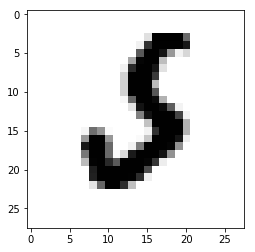

In [9]:
success = 0
failure = 0

for i in test_dataset_list:
    all_values = i.split(',')
    target = int(all_values[0])

    all_values_normalized = (np.asfarray(all_values[1:])/255.0*0.99) + 0.01
    prediction_list = pct.feedforward(np.asfarray(all_values_normalized))
    prediction = np.argmax(prediction_list)

    if target == prediction:
        success += 1

    else:
        failure += 1
        print("prediction fails, (target, prediction) = ", target, prediction)
        print("Prediction = ", prediction_list)
        im_array = np.asfarray(all_values_normalized).reshape((28,28))
        plt.imshow(im_array, cmap='Greys', interpolation='None')

print("Recognition error rate = ", (failure/(success+failure)))